In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import models, layers

In [3]:
import matplotlib.pyplot as plt


In [4]:
from IPython.display import HTML

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
IMAGE_SIZE = 256
CHANNELS = 3

train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

train_generator=train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse',
    
)


Found 1506 images belonging to 3 classes.


In [7]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [8]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [9]:
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.4906815  0.47499523 0.52989715]
  [0.5005701  0.48488384 0.5397858 ]
  [0.5089309  0.49324468 0.5481466 ]
  ...
  [0.59829235 0.5904492  0.6453512 ]
  [0.6091181  0.60127497 0.6561769 ]
  [0.6177867  0.60994357 0.6648455 ]]

 [[0.4936175  0.47793123 0.53283316]
  [0.458301   0.44261473 0.4975167 ]
  [0.42870164 0.41301537 0.46791732]
  ...
  [0.5992341  0.59139097 0.6462929 ]
  [0.61053073 0.6026876  0.65758955]
  [0.6187285  0.6108854  0.66578734]]

 [[0.6438686  0.62818235 0.6830843 ]
  [0.68671936 0.671033   0.72593504]
  [0.71497416 0.6992879  0.75418985]
  ...
  [0.6002638  0.59242064 0.64732265]
  [0.6118838  0.6040407  0.65894264]
  [0.61932725 0.6114841  0.6663549 ]]

 ...

 [[0.45076215 0.43902862 0.50560176]
  [0.54753083 0.53576607 0.6024328 ]
  [0.4570122  0.4452475  0.5119142 ]
  ...
  [0.68636245 0.6824409  0.73734283]
  [0.68512565 0.6812041  0.73610604]
  [0.68371296 0.6797914  0.7346934 ]]

 [[0.4619731  0.4502084  0.516875  ]
  [0.5391476  0.5273829  0.5940496 ]


In [10]:
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True
)

validation_generator = validation_datagen.flow_from_directory(
    'dataset/val',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [11]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True
)

test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [12]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(n_classes, activation="softmax"),
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [14]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [15]:
1506/32

47.0625

In [16]:
215/32

6.71875

In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20
)

Epoch 1/20
47/47 [==============================] - 80s 2s/step - loss: 0.9320 - accuracy: 0.4505 - val_loss: 0.8795 - val_accuracy: 0.4531
Epoch 2/20
47/47 [==============================] - 85s 2s/step - loss: 0.7709 - accuracy: 0.6506 - val_loss: 0.6431 - val_accuracy: 0.7344
Epoch 3/20
47/47 [==============================] - 80s 2s/step - loss: 0.7120 - accuracy: 0.6791 - val_loss: 0.5762 - val_accuracy: 0.7708
Epoch 4/20
47/47 [==============================] - 80s 2s/step - loss: 0.4383 - accuracy: 0.8141 - val_loss: 0.3826 - val_accuracy: 0.8385
Epoch 5/20
47/47 [==============================] - 83s 2s/step - loss: 0.3495 - accuracy: 0.8596 - val_loss: 0.4088 - val_accuracy: 0.8125
Epoch 6/20
47/47 [==============================] - 88s 2s/step - loss: 0.2889 - accuracy: 0.8779 - val_loss: 0.4108 - val_accuracy: 0.8125
Epoch 7/20
47/47 [==============================] - 83s 2s/step - loss: 0.2465 - accuracy: 0.9009 - val_loss: 0.2552 - val_accuracy: 0.9062
Epoch 8/20
47/47 [==

In [19]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 8s 575ms/step - loss: 0.0657 - accuracy: 0.9814


In [20]:
scores

[0.065681591629982, 0.9814385175704956]

# Plotting the Accuracy and Loss Curves

In [21]:
history

In [22]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [23]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch

In [24]:
type(history.history['loss'])

list

In [25]:
len(history.history['loss'])

20

In [26]:
history.history['loss'][:5] #show loss for first 5 epochs

[0.9320012927055359,
 0.7709407806396484,
 0.7119998335838318,
 0.43828654289245605,
 0.349461168050766]

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [28]:
val_acc

[0.453125,
 0.734375,
 0.7708333134651184,
 0.8385416865348816,
 0.8125,
 0.8125,
 0.90625,
 0.9479166865348816,
 0.90625,
 0.9791666865348816,
 0.9427083134651184,
 0.9635416865348816,
 0.9791666865348816,
 0.9739583134651184,
 0.9635416865348816,
 0.9114583134651184,
 0.9895833134651184,
 0.9791666865348816,
 0.984375,
 0.9791666865348816]

In [29]:
acc

[0.45047488808631897,
 0.6506105661392212,
 0.6791045069694519,
 0.8141112327575684,
 0.859565794467926,
 0.8778833150863647,
 0.9009497761726379,
 0.882632315158844,
 0.9199457168579102,
 0.9518317580223083,
 0.9620081186294556,
 0.9620081186294556,
 0.9708276987075806,
 0.9626865386962891,
 0.9667571187019348,
 0.9538670182228088,
 0.9748982191085815,
 0.9877883195877075,
 0.9837177991867065,
 0.9660786986351013]

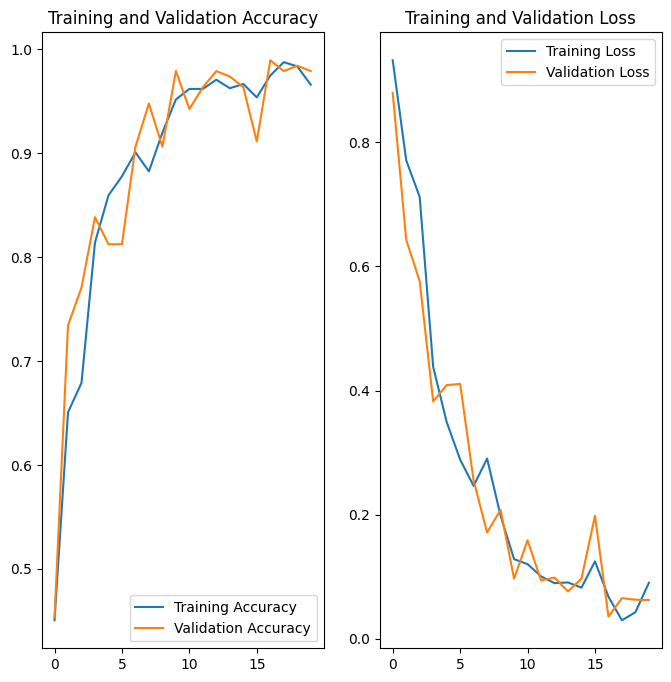

In [30]:
EPOCHS = 20

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label="Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label="Training Loss")
plt.plot(range(EPOCHS), val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()

NameError: name 'dataset' is not defined

# Run Prediction on a Sample Images

first image to predict
actual label: Potato___healthy
1/1 [==============================] - 0s 479ms/step
predicted label: Potato___healthy


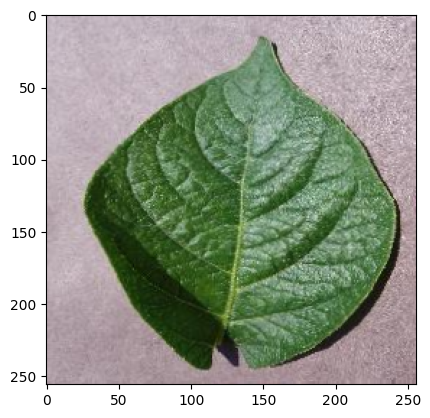

In [31]:
import numpy as np

for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])  

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:", class_names[first_label]) 

    batch_prediction = model.predict(image_batch)  
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])

    break


# write a function for inference

In [36]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100* (np.max(predictions[0])),2)
    return predicted_class, confidence

# Running Inference on Sample Images

1/1 [==============================] - 0s 34ms/step


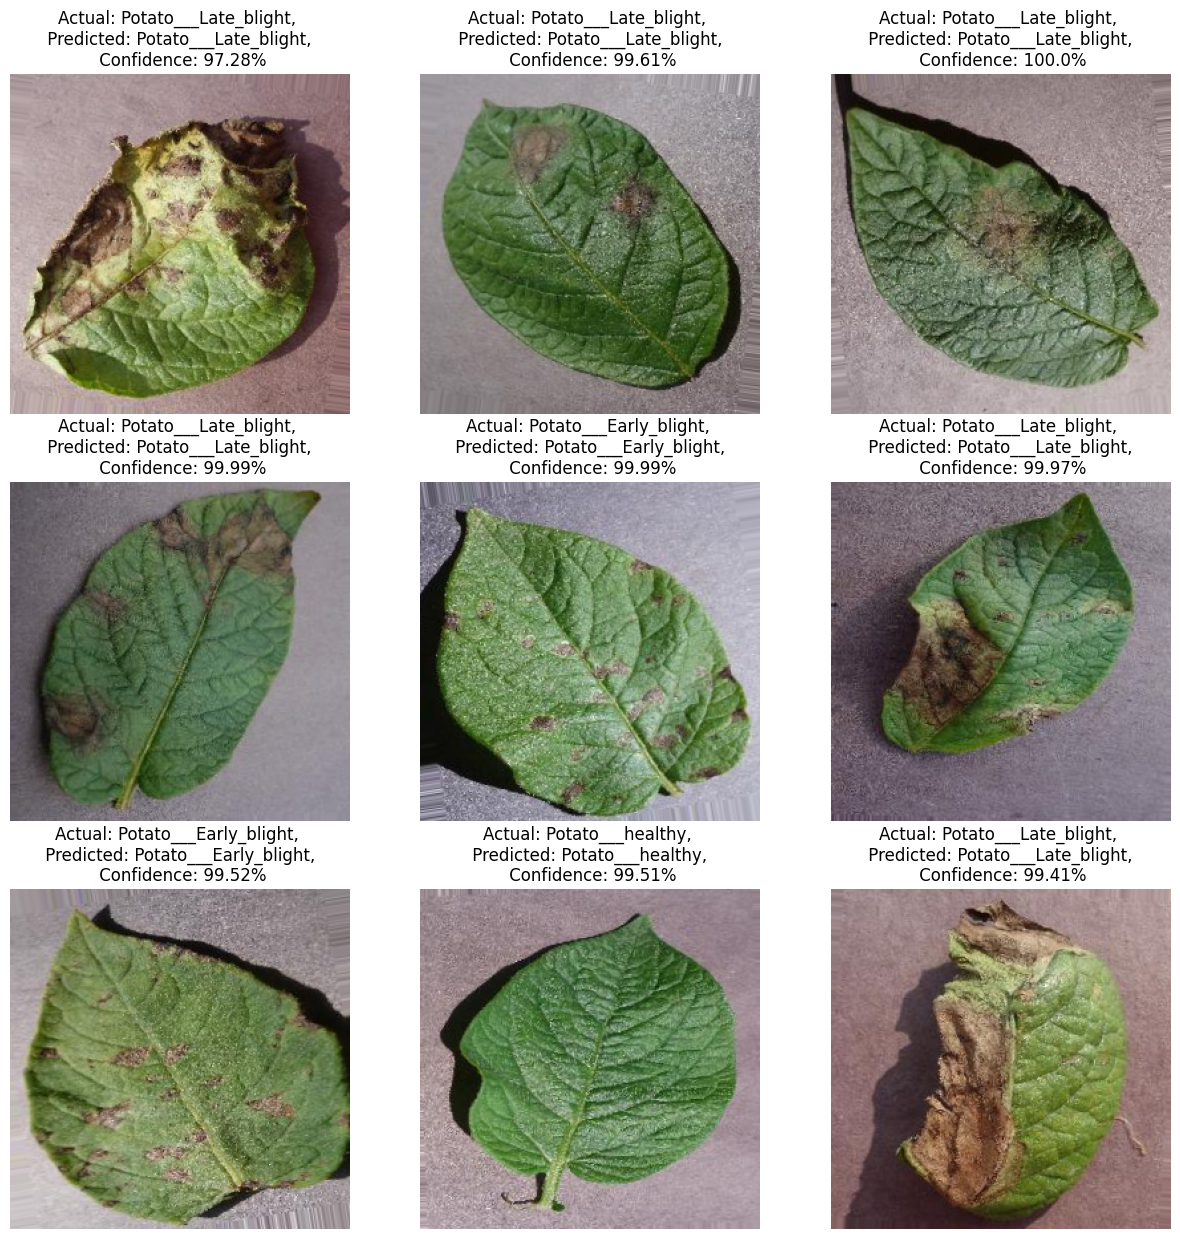

In [37]:
plt.figure(figsize=(15,15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}, \n Confidence: {confidence}%")
        plt.axis("off")
    break

# saving the Model

In [38]:
model.save("../potatoes.h5")

C:\Users\hp\anaconda3\envs\myvenv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
